<a href="https://colab.research.google.com/github/Valentin-Iva/Team-2-Project/blob/main/team_2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
heart_data = pd.read_csv("heart(in).csv")

FileNotFoundError: [Errno 2] No such file or directory: 'heart(in).csv'

# **Definitions of variables**

## **cp - Chest pain type**

Categorising the type of chest pain from 0 to 3

0 - Typical Angina: substernal chest pain highly linked to heart disease or conditions (e.g.,coronary artery disease) that can lead to heart disease. Angina causes complications with blood flow to heart.

1 - Atypical Angina: Symptoms deviate from normal angina symptoms and does not fit the normal description.

2 - Non-anginal pain: Can also be known as non cardiac chest pain, chest pain behaves like angina symptoms but caused by other issues.

3 - Asymptomatic: Silent heart attack. minimal / no symptoms but can lead to heart failure.

## **trestbps: Resting blood pressure**

High blood pressure (hypertension) creates higher risk of cardiovascular disease

140 - 190 indicates stage 2 hypertension

130 - 139 indicates stage 1 hypertension

120-129 elevated blood pressure

< 120 normal blood pressure range

< 90 low blood pressure  

## **chol: Cholesterol**

Higher cholestoral increases risk of heart attack / stroke due to excess fat sticking to blood vessels and decreaing oxygen flow

checks **total cholestoral** in blood measured in mg/dl

optimal: < = 200mg/dl

At risk: 200 to 239mg/dl

High: 240mg/dl+

## **fbs: Fasting blood sugar**

1: blood sugar levels are over 120mg/dl

0: normal

High blood sugar levels could be an indicator of prediabetes / diabetes. High blood glucose can damage blood vessels/ nerves that control the heart and overtime lead to heart disease.

## **restecg: Resting electrocardiographic result**

Test to record activity of heart activity, checking for symptoms of heart disease and abnormalities.
Categorised into 3 values:

0: Normal

1: ST-T wave abnormaility
  - includes T wave inversions (important to note as T-wave inversions with upsloping can indicate certain conditions related to heart disease)
  - includes ST elevation / depression with a measure of 0.5mv+
  - deviates from normal results and can indicate underlying cardiovasular disease but not always. Results are skewed from typical results

2: Definite left ventricular hypertrophy
   - left ventricle is thicker becoming harder for heart to bump blood and blood pressure has increased. Risk factor for cardiovascular disease

## **thalach: Max heart rate**

The maximum heart rate achieved.
A high heart rate can be a sign or cause of heart disease developing over time.

## **Exang: Exercise induced angina**

patient's angina (chest pain due to not enough blood flow to heart) influenced and worsened by physical activity

1: yes

0: no

## **oldpeak: ST depression**

Describes the extent of ST depression during exercise stress test relative to rest.

ST segment in ECG examination shows the cardiac cycle of contractions of myocardium (thick muscular layer of heart)  when blood is expelled from the ventricles.

Findings of ST depression may have links to several cardiovascular conditions (e.g.,mycocardial ischemia where blood flow to heart is decreased).

ST depression segment of 0.5+ is indicator for underlying heart conditions (or other unrelated conditions) as it has fallen below baseline.  

## **slope: slope of peak exercise ST segment**
Additional information to the heart response to exercise under ECG examination

split into 3 categories:
  - 0 upsloping: typically considered normal finding under exercise
  - 1 flat: can be a sign of myocardial ischemia / heart failure
  - 2 downsloping: asscociated with myocardial ischemia and other heart related conditions

## **ca: number of major vessels**

number of major vessels seen under fluoroscopy (medical imaging to see inside  of body). Type of fluroscopy is assumed to be a cardiac angiogram that checks for the three major blood vessels.

categorised from 0-4:
A higher number is considered better as there are more visible open vessels and better blood flow, reducing risk of heart disease.
## **thal: thalassemia**

assess if diagnosed with thalassemia. This is a group of inherited conditions that affect haemoglobin.

thalassemia can cause heart disease such as heart failure, cardiomyopathy due to iron overload in the body. Categorised from 0-3 from stress thallium scan:

0 None

1 normal

2 fixed defect:
  - blood flow reduced (or none at all) in parts of the heart. Often from long term thalassemia and is permenant meaning irreversible damage to heart.

3 reversible defect:
  - blood flow detected however it is not normal. This can be treated with further medical investigation which is why it is reversible. Still poses risk for heart disease or heart attack



## **target: Target variable**
The variable we want to predict

1: patient has heart disease

0: patient is healthy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore')

py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

%matplotlib inline
# Plot in SVG format since this format is more sharp and legible
%config InlineBackend.figure_format = 'svg'

path = 'heart(in).csv'
df = pd.read_csv(path)

num_cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

#Making data more readable
df['sex'] = df['sex'].apply(lambda x: 'male' if x == 1 else 'female')
df['exang'] = df['exang'].map({1: 'Yes', 0:'No'})

print(df.isnull().sum()) #Counts how many null values there are per column (none)
df.rename(columns={"sex":"gender"}, inplace=True) #Renaming a column
df.describe() #shows 303 entries and their means, standard deviation, etc
df.to_csv("cleanedData.csv", index=False) #export data for upload to tuleap

FileNotFoundError: [Errno 2] No such file or directory: 'heart(in).csv'

Data Visualisation Below:

In [ ]:
heart_data.info()

Display the columns, number of records and datatype of each column. From this we can see there are no null values in cleaned the data set. Viewing datatypes can also be helpful to distinguish certain features for exploring the data however all of the values seem to be numerical.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

# Create two dataframes to compare
diseaseDF = pd.read_csv("cleanedData.csv")
diseaseDF = diseaseDF[diseaseDF.target == 1]

healthyDF = pd.read_csv("cleanedData.csv")
healthyDF = healthyDF[healthyDF.target == 0]

diseaseDF["trestbps"].hist(alpha=0.5)
healthyDF["trestbps"].hist(alpha=0.5)
plt.title("Resting Blood Pressure in Patients")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Number of patients")
plt.legend(["Unhealthy","Healthy"])

Blood pressure appears follow a normal distribution. The distribution of unhealthy patients have a higher mean than healthy patients. - Winter

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

# Create two dataframes to compare
diseaseDF = pd.read_csv("cleanedData.csv")
diseaseDF = diseaseDF[diseaseDF.target == 1]

healthyDF = pd.read_csv("cleanedData.csv")
healthyDF = healthyDF[healthyDF.target == 0]

diseaseDF["age"].plot.hist(alpha=0.5)
plt.title("Age of Patients")
healthyDF["age"].plot.hist(alpha=0.5)
plt.xlabel("Age (years)")
plt.ylabel("Number of patients")
plt.legend(["Unhealthy","Healthy"])

Healthy patients appear to have a higher mean age than unhealthy patients and a smaller standard deviation. Possibly because you are more likely to be screened for heart disease if you are old or already exhibit symptoms. - Winter

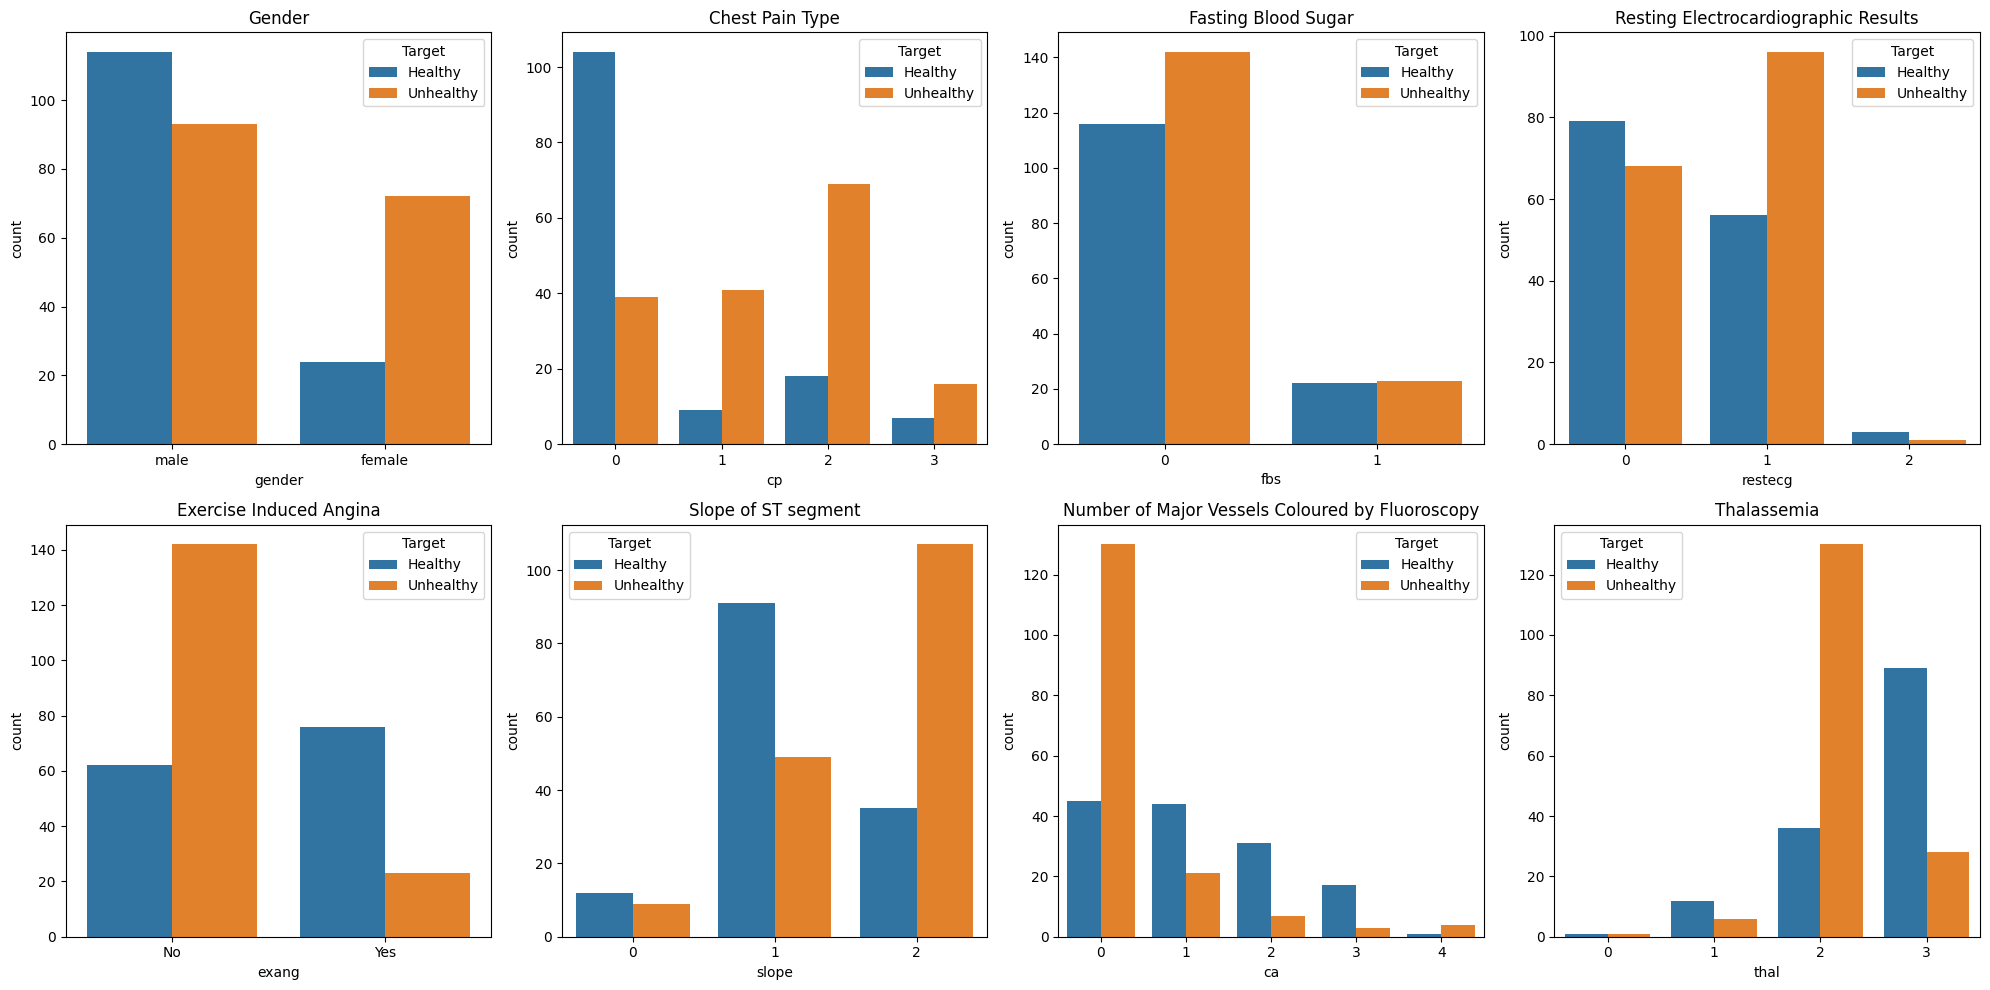

In [ ]:
#Alex

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
df = pd.read_csv("/content/cleanedData.csv")
#number of data points for each feature, seperated by whether data point has heart disease or not
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10)) # Removed subplot_titles

cat_feat = ['gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# Define an appropriate list of titles for each subplot
plot_titles = ["Gender","Chest Pain Type", "Fasting Blood Sugar","Resting Electrocardiographic Results","Exercise Induced Angina","Slope of ST segment","Number of Major Vessels Coloured by Fluoroscopy","Thalassemia"]

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/4), idx%4]
    sns.countplot(x=feature, hue='target', data=df, ax=ax)
    ax.set_title(plot_titles[idx]) # Set individual title for each subplot

    # Customize the legend labels for each subplot
    handles, labels = ax.get_legend_handles_labels()
    new_labels = []
    for label in labels:
        if label == '0':
            new_labels.append('Healthy')
        elif label == '1':
            new_labels.append('Unhealthy')
        else:
            new_labels.append(label)

    ax.legend(handles, new_labels, title="Target") # Apply custom legend labels

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

The above diagram shows graphs representing the categorial features of the dataset using bar charts.

Chest pain: the heart desease diagnosis is greater among the patients that feel any chest pain.

Restegc - Eletrocardiagraph results: the rate of heart desease diagnoses higher for patients with a ST-T wabe abnormality .

Slope: The ratio of patients diagnosed with heart desease is higher for slope = 2

Ca: The diagonosed ratio decreases fo ca between 1 and 3.

Thal: the diagnosed ratio is higher for thal = 2.




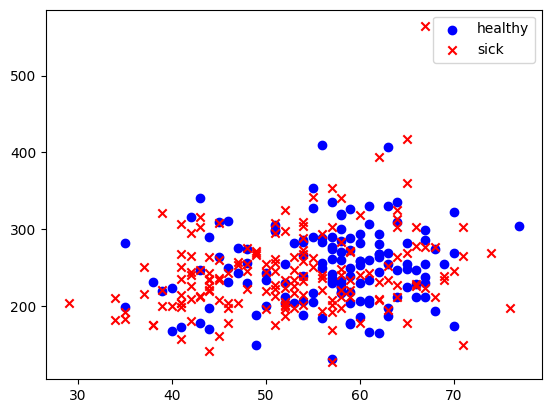

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore')

py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

plt.figure()
plt.scatter(df[df['target'] == 0]['age'], df[df['target'] == 0]['chol'], marker='o', c='blue', label='healthy')
plt.scatter(df[df['target'] == 1]['age'], df[df['target'] == 1]['chol'], marker='x', c='red', label='sick')

plt.legend()

This scatter diagram shows age(25-80) x-axis in relation to cholestero levels(200-500) y-axis. It also shows which of the units are sick or healthy. From this we can see that there is a weak positive correlation. (Valentin)

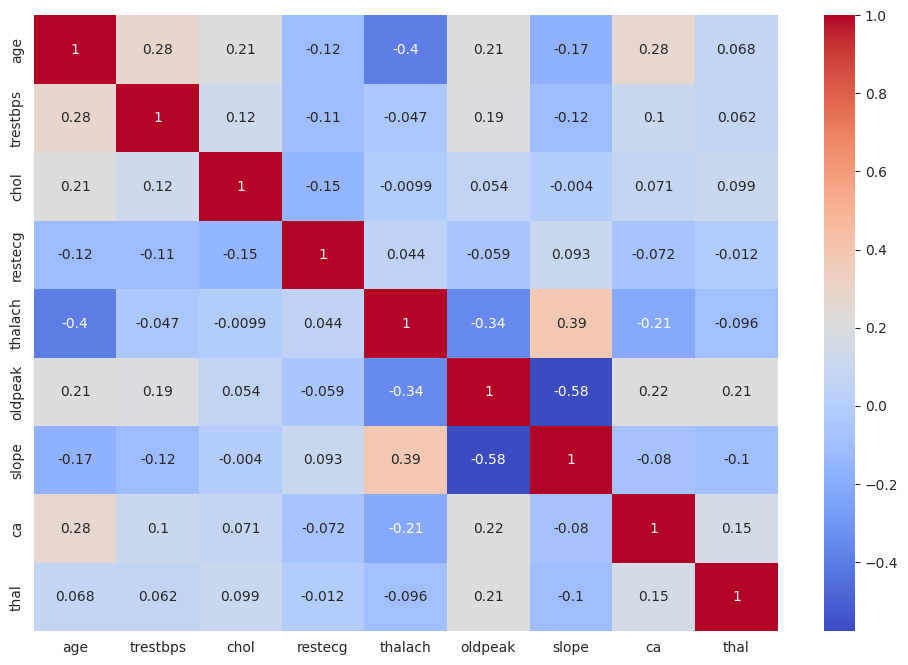

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore')

py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

plt.rcParams['figure.figsize']= (12,8) # figure size
sns.set_style('darkgrid') # Style

plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['target', 'gender', 'cp', 'fbs', 'exang'], axis=1).corr(), annot=True, cmap='coolwarm');


This heatmap shows the correlation (PMCC) between different factors (-1= perfect negative correlation, 1=perfect positive, 0=no correlation). The factors with the highest correlation here are oldpeak and slope.(Valentin)

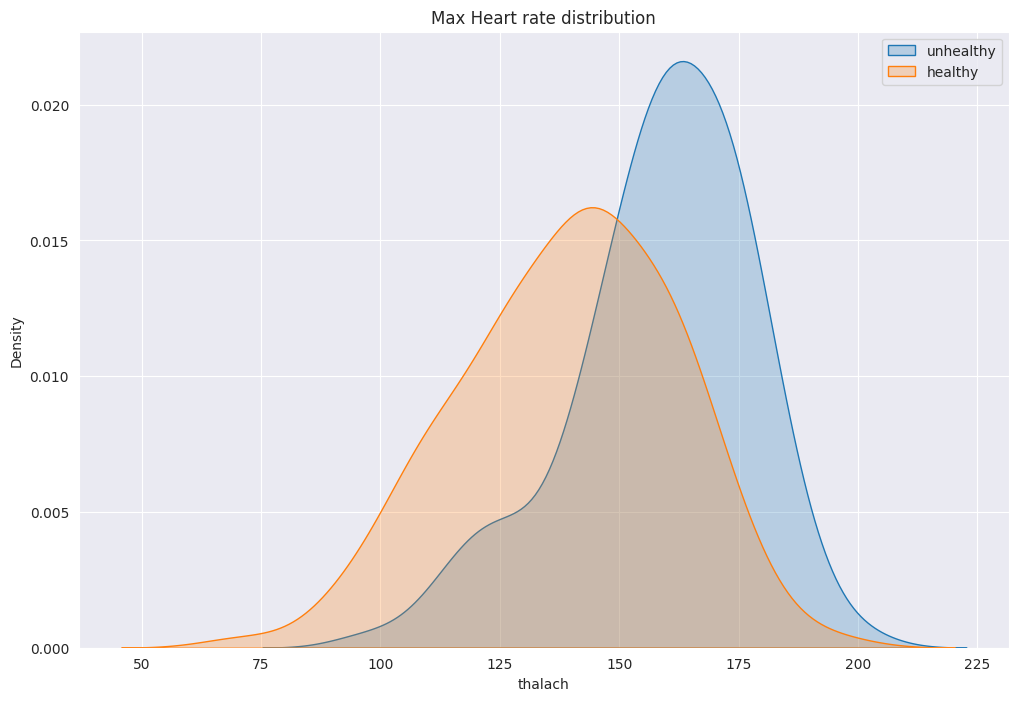

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

heart_data = pd.read_csv("/content/cleanedData.csv")
# check heart rate values of patients who are sick
sns.kdeplot(heart_data[heart_data.target == 1].thalach, fill= True, label =  'unhealthy')
# check heart rate values of patients who are healthy
sns.kdeplot(heart_data[heart_data.target == 0].thalach, fill= True, label =  'healthy')
# apply descriptions
plt.legend(["unhealthy", "healthy"])
plt.title("Max Heart rate distribution")
plt.show()

Diagram above shows the max heart distribution of patients who are healthy and  unhealthy. Healthy patients tend to have a lower maximum heart rate with the distribution peak at around the 125-150 range whereas patients detected with heart disease are shown to have a much higher maximum heart rate with the peak being around 150-175 - Monica

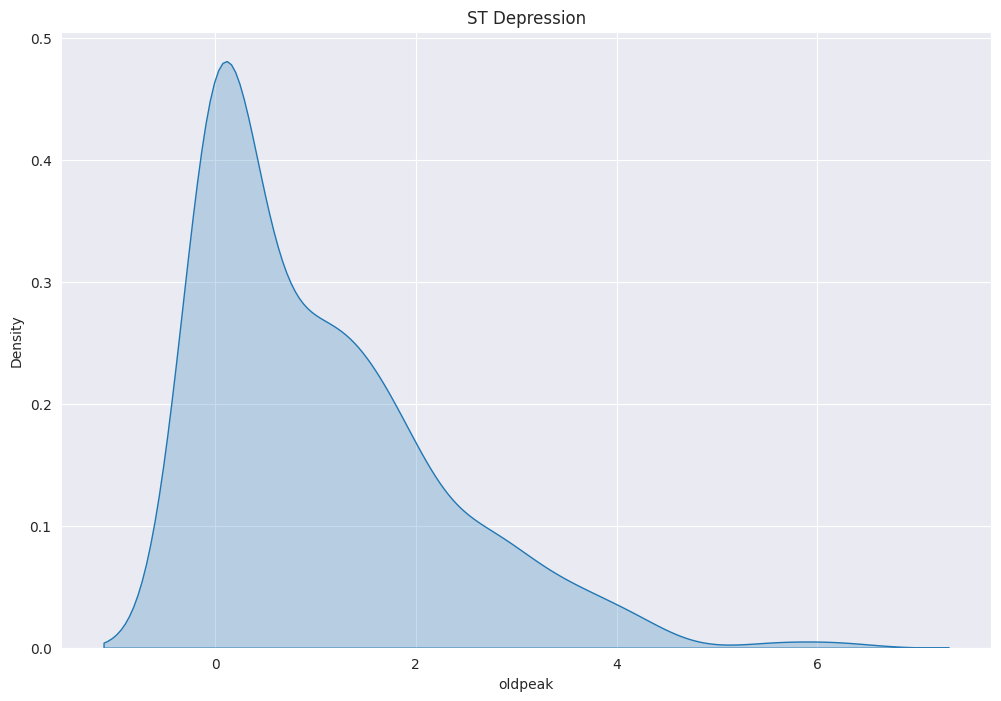

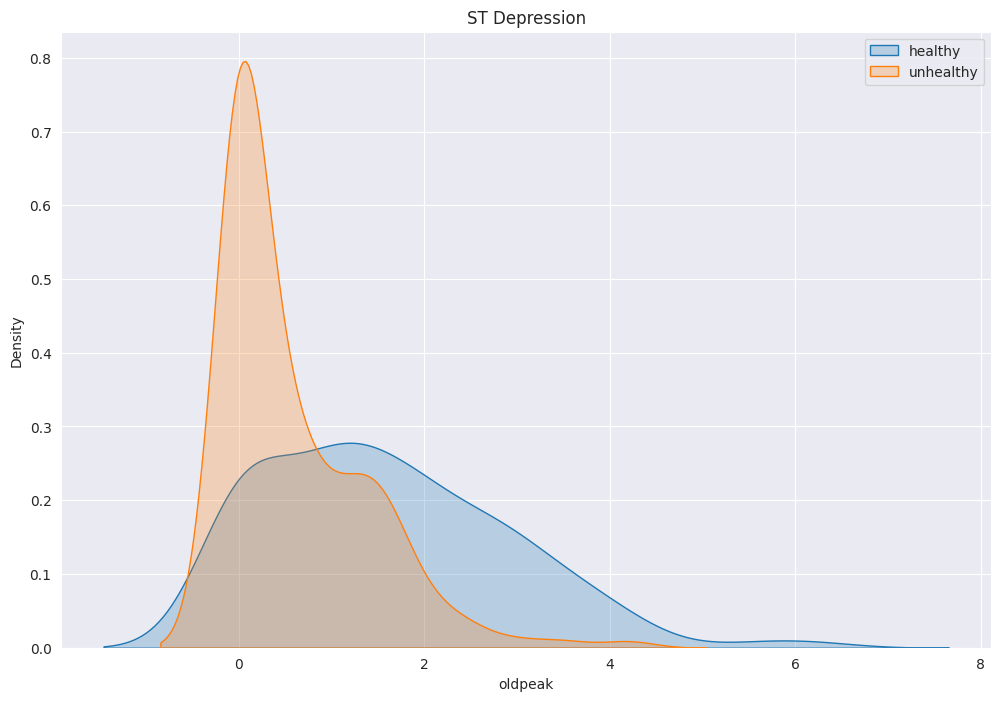

In [ ]:
sns.kdeplot(heart_data.oldpeak, fill= True, label =  'unhealthy')
plt.title("ST Depression")
plt.show()

sns.kdeplot(heart_data[heart_data.target == 0].oldpeak, fill= True, label =  'healthy')
sns.kdeplot(heart_data[heart_data.target == 1].oldpeak, fill= True, label =  'unhealthy')
plt.legend(["healthy", "unhealthy"])
plt.title("ST Depression")
plt.show()

First diagram provides a general overview of the oldpeak variable which shows the extent of ST depression through exercise in comparison to rest. The peak at 0 shows there is a higher amount of patients who have reported around or near 0 ST depression. By seperating the variable by healthy and unhealthy targets in second density plot we can see range of values of ST depression where patients have been detected with heart disease against those who are healthy - Monica

Cloning into 'heart_data'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
Receiving objects: 100% (3/3), 4.12 KiB | 4.12 MiB/s, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)


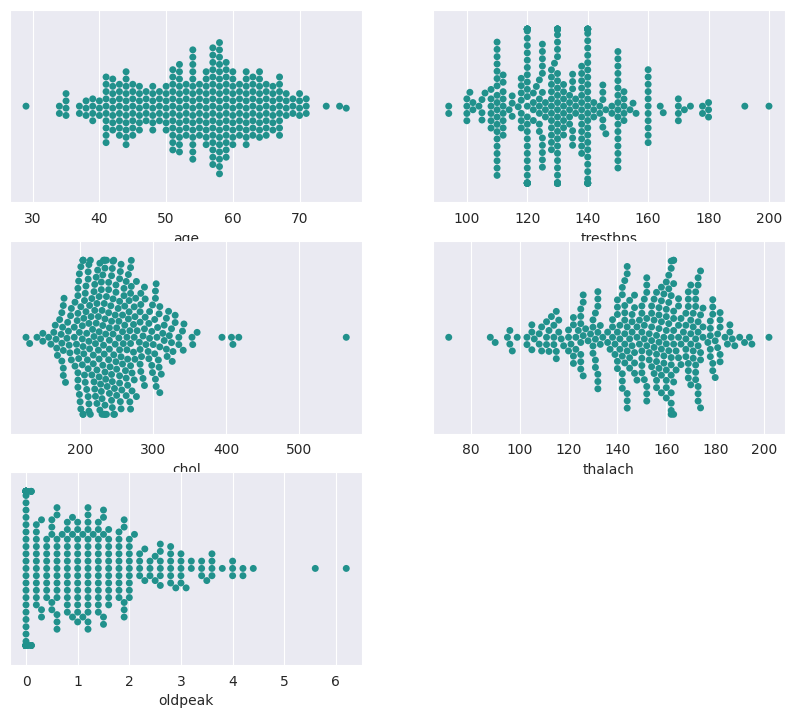

In [ ]:
!git clone https://github.com/mf25266/heart_data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#heart_data = pd.read_csv("/content/heart_data/clean_heart_data.csv")

numerical_data = heart_data[["age", "trestbps", "chol", "thalach", "oldpeak"]]

plt.figure(figsize= (10,len(numerical_data)*3))

for i, col in enumerate(numerical_data,1):
  plt.subplot(len(numerical_data), 2, i)
  sns.swarmplot(x= col, data = heart_data, palette= "viridis")

Graph shows the swarm plot of numerical features in the dataset which helps to spot for outliers which are values that are significantly different from other values in the same column, and see where the data is most concetrated for each feature . There seems to be an insignficant amount of only 1-2 per feature. This could also be a very normal variation of the dataset.  - Monica

<Figure size 300x300 with 0 Axes>

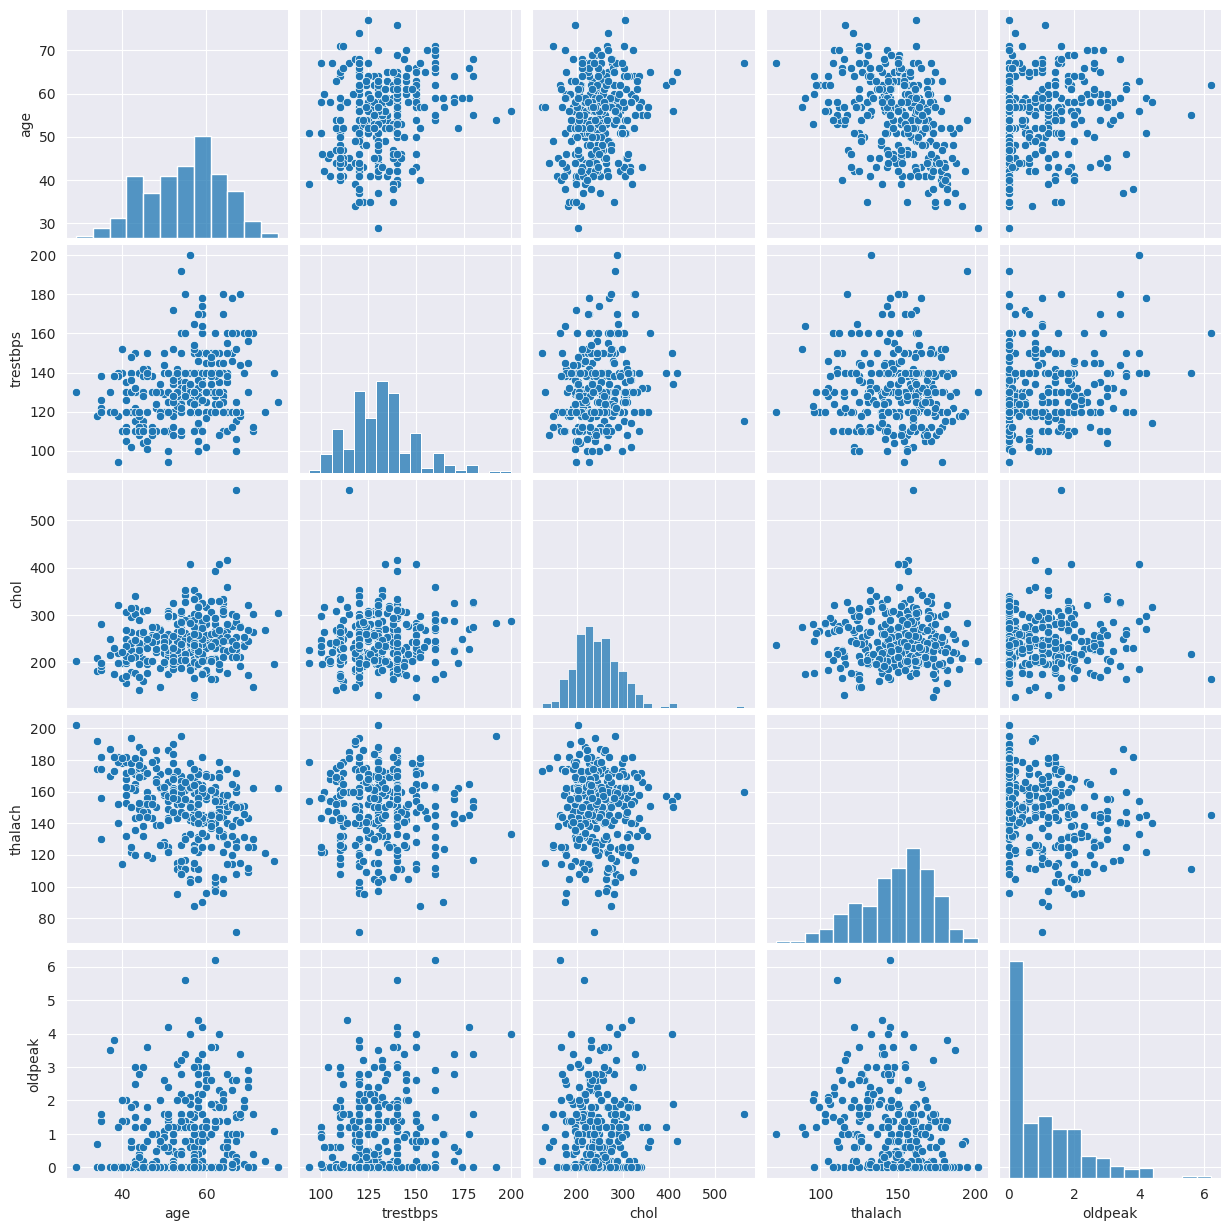

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heart_data = pd.read_csv("/content/heart_data/clean_heart_data.csv")

num_cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(3,3))
sns.set_style('darkgrid')
sns.pairplot(heart_data[num_cont_feat])

This scatter plot matrix shows that older patients usually have lower maximum heart rates, while the high cholesterol and resting blood pressure often overlap with each other, which alludes to the combined effects and risk factors of heart disease being another factor to consider. -Daniel


Text(0.5, 1.0, 'Distribution of Cholesterol by Sex')

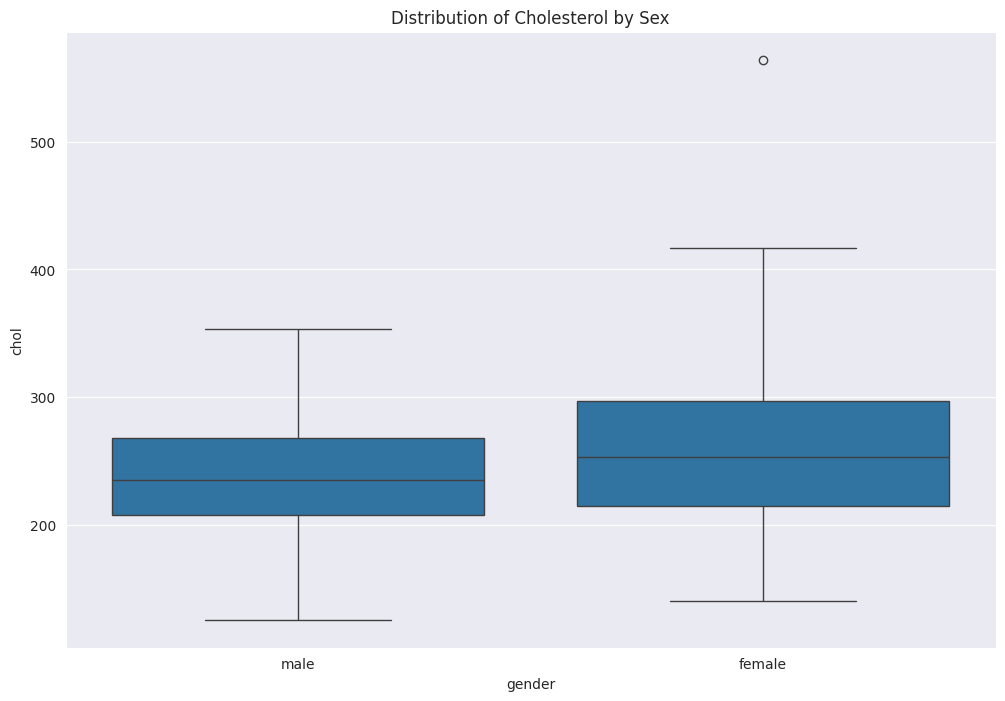

In [ ]:
sns.boxplot(x='gender', y='chol', data=df)
plt.title("Distribution of Cholesterol by Sex")


The box plot above shows the distribution of colesterol in mg/dl between the sexes in this dataset. This plot shows that female patients have a wider spread and higher median than males, however there is overlap between the sexes meaning that the differences aren't as significant. - Delyth

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("/heart_data.csv")

#spread the bubbles to make it easier to read
x_jittered = df['oldpeak'] + np.random.normal(0, 0.1, size=len(df))
y_jittered = df['slope'] + np.random.normal(0, 0.1, size=len(df))

plt.figure(figsize=(10,6))

# Get the 'coolwarm' colormap
cmap = plt.get_cmap('coolwarm')

sns.set_style('darkgrid')

# Plot for target=1 Unhealthy
plt.scatter(
    x_jittered[df['target']==1],
    y_jittered[df['target']==1],
    s=df[df['target']==1]['chol'] / 2, #half value of chol to make the bubbles smaller
    c=[cmap(1.0)], # Color for target 1 (red end of coolwarm)
    alpha=0.6, #transparency
    edgecolors='w', #bubble outline color
    label='Unhealthy' # Label for the legend
)
# Plot for target=0 Healthy
plt.scatter(
    x_jittered[df['target']==0],
    y_jittered[df['target']==0],
    s=df[df['target']==0]['chol'] / 2, #half value of chol to make the bubbles smaller
    c=[cmap(0.0)], # Color for target 0 (blue end of coolwarm)
    alpha=0.6, #transparency
    edgecolors='w', #bubble outline color
    label='Healthy' # Label for the legend
)

plt.xlabel("ST Depression (oldpeak)")
plt.ylabel("Slope of ST Segment")
plt.title("Bubble Chart: Oldpeak vs Slope\nBubble size = Cholesterol, Color = Heart Disease")
plt.legend(title='Target')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/heart_data.csv'

The bubble plot shows that the indiviuals with heart disease (red bubbles) usually display higher oldpeak values and flatter or downslopping ST segments (slope). Whereas those without heart disease (Blue bubbles) tend to have lower old peaks and upsloping ST segments. Also the cholesterol levels for both healthy and unhealthy people are largely varied showing less visual correlation to having heart disease.
-Jack

# Advanced EDA / Group by

In [ ]:
import pandas as pd
heart_data = pd.read_csv("cleanedData.csv")
# create group from chest pain type and target and only display age
# display most common values
chest_pain_group = heart_data.groupby(["cp", "target"])["age"].aggregate(pd.Series.mode)
slope_mx_group = heart_data.groupby(["slope", "target"])["thalach"].aggregate(pd.Series.mode)
print(chest_pain_group,"\n")
print(slope_mx_group)


Here we can check the most common values for the chest pain type variable using mode and group by to find what the most common age range for each type is commonly diagnosed with heart disease. For example the most common age to be diagnosed with heart disease that have atypical agina is 41 whereas those without heart disease but have atypical agina the most common age is 59

The most common max heart range for patients with heart disease and on category 2 slope is between 163 - 172.

Monica

In [ ]:
#Alex
import pandas as pd
df = pd.read_csv("cleanedData.csv")
g = df.groupby("target")
g.mean(numeric_only=True)

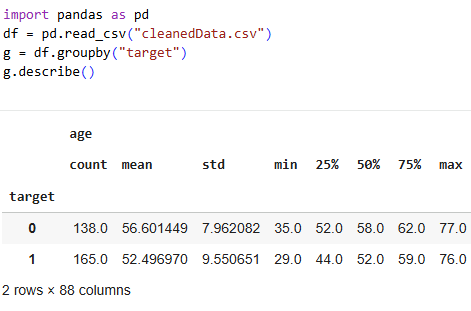

# Data Splitting Below

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

cleaned_heart_data = pd.read_csv("cleanedData(1).csv")

# divide input features from target variable to use to test and predict target
input_features = cleaned_heart_data.drop(columns="target")
target_data = cleaned_heart_data['target']

# set random state to ensure we get the SAME randomised dataset split instead of different result each time
# set test size of 30% the rest will be used for training
input_train, input_test, target_train, target_test = train_test_split(input_features, target_data, random_state = 42, test_size = 0.3)

# comparing amount of values in each dataset ensuring data split was implemented correctly
print(f"Input variables: {input_features.shape}")
print(f"Input variables training: {input_train.shape}")
print(f"Input variables test: {input_test.shape}")
print(f"Target variable: {target_data.shape}")
print(f"Target variable training: {target_train.shape}")
print(f"Target variable test: {target_test.shape}")

# splitting data from test data for validation using training data
input_val_train, input_val, target_val_train, target_val = train_test_split(input_train, target_train, test_size= 0.2, random_state= 42)



Start by dividing the main dataset from the input variables and the target data that we are trying to predict, in this case these are all the independent variables that will be used to predict the target variable.

using the train_test_split function we will split the dataset into training and test sets. Training sets are used to train (fit) the model to identify the relationships and understand the data to make predictions.

The test set will be used to evaluate the performance of the model to see how well the model predicts values based on unseen data. The test size for both data portions are 30% as a starting point.

Lastly using the training portion of the input and target variables the validation set is created. This helps to spot overfitting during training ensuring that it is making accurate predictions to new data instead of just  predicting training samples. It also allows us to know when the model has been sufficiently trained and if the training is being done correctly.

Monica

#Feature Analysis Below

In [ ]:
df = pd.read_csv('heart(in).csv')
g = df[['thal', 'age']].groupby("thal")
print(g.describe())

Thallium scan(how blood flows to heart during exercise/rest) level 3 is most dangerous level. This is shown relating to age. The data could suggest that there is no strong correlation between thal and age as The averages are all pretty similar and higher levels like 2 and 3 have ages ranging from 29 to 77 and 35 to 70. (Valentin)

In [ ]:
db = pd.read_csv("heart(in).csv")
df = db[['target', 'age']].groupby("target")
df.describe()

Individuals with a target value of 1 (have heart disease) tend to be between the ages of 40 and 60, while those with target value of 0 are generally older. This suggets that heart disease is more commmon for middle ages people. -Jack

In [ ]:
avg_df = df.groupby("age", as_index=False)["chol"].mean()

avg_df.plot(x="age", y="chol", kind="scatter")

This scatter diagram shows the average cholesterol per age. It shows a strong positive correlation between age and cholesterol. High cholesterol is a cause of Heart Disease. (Valentin)

# Logistic Regression

In [ ]:
# MONICA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

cleaned_heart_data = pd.read_csv("cleanedData.csv")

# replace values to numeric only so data can be scaled
cleaned_heart_data.replace("male", 0, inplace=True)
cleaned_heart_data.replace("female", 1, inplace = True)
cleaned_heart_data['exang'].replace("No", 0, inplace=True)
cleaned_heart_data['exang'].replace("Yes", 1, inplace=True)

# divide input features from target variable to use to test and predict target
input_features = cleaned_heart_data.drop(columns="target")
target_data = cleaned_heart_data['target']

# set random state to ensure we get the SAME randomised dataset split instead of different result each time
# set test size of 30% the rest will be used for training
input_train, input_test, target_train, target_test = train_test_split(input_features, target_data, random_state = 42, test_size = 0.4)
# splitting data from test data for validation using training data
input_val_train, input_val, target_val_train, target_val = train_test_split(input_train, target_train, test_size= 0.2, random_state= 42)

#feature scaling allows balanced processing of dataset features
scale = StandardScaler()
scale.fit(input_train)
# scale the independent training data
input_train_scaled = scale.transform(input_train)
# scale the indpendent test data
input_val_scaled = scale.transform(input_val)

# model
model = LogisticRegression()

# fit model
model.fit(input_train_scaled, target_train)

# predict
target_pred = model.predict(input_val_scaled)

# accuracy
accuracy = accuracy_score(target_val, target_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.8918918918918919


In [ ]:
# MONICA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

cleaned_heart_data = pd.read_csv("cleanedData.csv")

# replace values to numeric only so data can be scaled
cleaned_heart_data.replace("male", 0, inplace=True)
cleaned_heart_data.replace("female", 1, inplace = True)
cleaned_heart_data['exang'].replace("No", 0, inplace=True)
cleaned_heart_data['exang'].replace("Yes", 1, inplace=True)

# divide input features from target variable to use to test and predict target
input_features = cleaned_heart_data.drop(columns="target")
target_data = cleaned_heart_data['target']

# set random state to ensure we get the SAME randomised dataset split instead of different result each time
# set test size of 30% the rest will be used for training
input_train, input_test, target_train, target_test = train_test_split(input_features, target_data, random_state = 42, test_size = 0.4)
# splitting data from test data for validation using training data
input_val_train, input_val, target_val_train, target_val = train_test_split(input_train, target_train, test_size= 0.2, random_state= 42)

#feature scaling allows balanced processing of dataset features
scale = StandardScaler()
scale.fit(input_train)
# scale the independent training data
input_train_scaled = scale.transform(input_train)
# scale the indpendent test data
input_val_scaled = scale.transform(input_val)

# model
model = LogisticRegression()

# fit model
model.fit(input_train_scaled, target_train)

# predict
target_pred = model.predict(input_val_scaled)

# accuracy
accuracy = accuracy_score(target_val, target_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.8918918918918919


In [ ]:
# Winter
# Continuing from above

target_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
target_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
250,0
19,1
143,1
79,1


In [ ]:
accuracy_score(target_val, target_pred)

0.8604651162790697

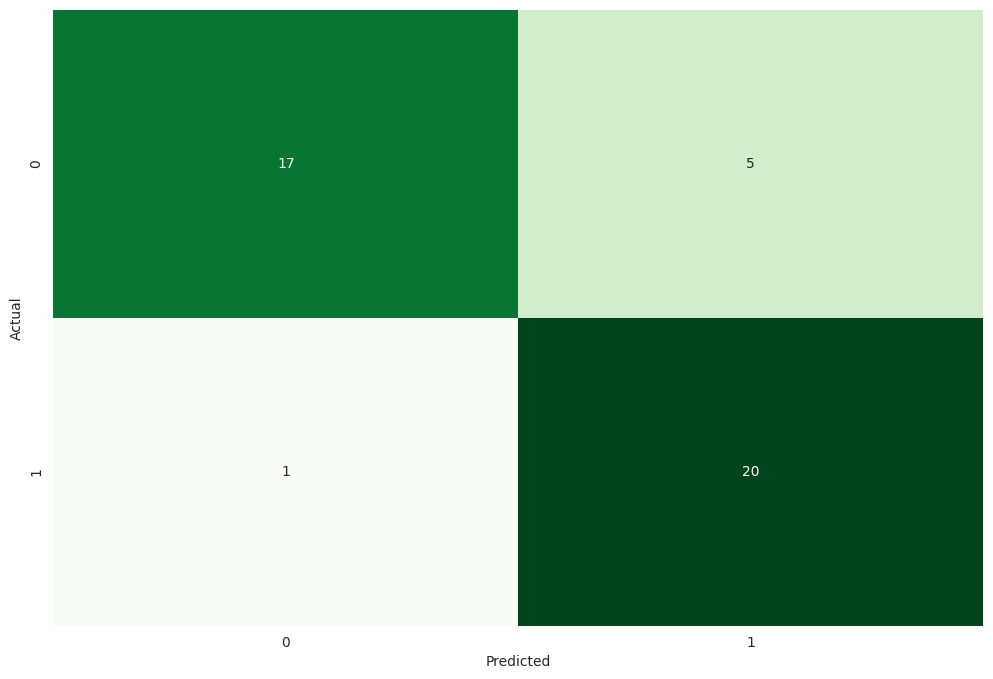

In [ ]:
#valentin
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(target_val, target_pred)

sns.heatmap(conf_matrix, cmap="Greens", annot=True, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#I am adding a confusion matrix to the Logistic regression classification to show how accurate it is
#e.g. There are 5 cases where the model predicted the patient has heart disease when they acutally don't


In [ ]:
#
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

cleaned_heart_data = pd.read_csv("cleanedData.csv")

# replace values  to numeric only so data can be scaled
cleaned_heart_data.replace("male", 0, inplace=True)
cleaned_heart_data.replace("female", 1, inplace = True)
cleaned_heart_data['exang'].replace("No", 0, inplace=True)
cleaned_heart_data['exang'].replace("Yes", 1, inplace=True)

# divide input features from target variable to use to test and predict target
input_features = cleaned_heart_data.drop(columns=["target", "restecg", "ca"]) # x features
target_data = cleaned_heart_data['target'] # target we want to predict


# normalise the data
# scaler object
scaler = StandardScaler()

# fit scaler to data independent variables
scale_X = scaler.fit_transform(input_features)
scale_X

# data split
# data test size is 30%
input_train, input_test, target_train, target_test = train_test_split(input_features, target_data, random_state = 42, test_size = 0.4)
# x test should be seperated

# model training
model = LogisticRegression()
model.fit(input_train, target_train)

# prediction
target_pred = model.predict(input_test)
target_pred

# model evaluation
print(f"Train Accuracy: {model.score(input_train,target_train)}")
print(f"Test Accuracy: {model.score(input_test,target_test)}")

print(classification_report(target_test, target_pred))


Train Accuracy: 0.856353591160221
Test Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.88      0.86      0.87        70

    accuracy                           0.85       122
   macro avg       0.85      0.85      0.85       122
weighted avg       0.85      0.85      0.85       122



Above are two logistic regression models that predict the chance of heart disease based on the training and test data. Logistic regression is a model that makes predictions based on independent variables. Before training and fitting the model, the data must be cleaned again by assigning numeric values to categorial features. The features are normalised/ scaled as the dataset contains values with different measurements (some being near 0 while others are larger numbers) which can affect how the model analyses the data.

Once the data has been normalised we can fit the model using the logistic model class. The model predicts based on the independent test values with the goal of getting as close to the target test data as possible. The first model was trained using validation data which gave a score of around 86% accuracy. The second model used the actual test data with smaller test size to see different variation of the model evaluation. Overrall the model performed at 83% precision on patients without heart disease and 87% on patients with heart disease.

Monica

#Hyperparameter Tuning

monica

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

cleaned_heart_data = pd.read_csv("cleanedData.csv")

# replace values  to numeric only so data can be scaled
cleaned_heart_data.replace("male", 0, inplace=True)
cleaned_heart_data.replace("female", 1, inplace = True)
cleaned_heart_data['exang'].replace("No", 0, inplace=True)
cleaned_heart_data['exang'].replace("Yes", 1, inplace=True)

# divide input features from target variable to use to test and predict target
input_features = cleaned_heart_data.drop(columns=["target", "restecg", "ca"]) # x features
target_data = cleaned_heart_data['target'] # target we want to predict


# normalise the data
# scaler object
scaler = StandardScaler()

# fit scaler to data independent variables
scale_X = scaler.fit_transform(input_features)
scale_X

# data split
X_train_val, X_test, y_train_val, y_test = train_test_split(scale_X, target_data, test_size= 0.2, shuffle = True ,random_state=42)
# x test should be seperated

# model training
model = LogisticRegression()
# implementing cross validation. This helps to see how to model performs on unseen data and prevent overfitting
evaluations = cross_val_score(model, X_train_val, y_train_val, cv=5)
print("cross-val scores: ", evaluations)
print("mean cross-val score:", np.mean(evaluations))
#construct param grid
param_grid = [
    {"penalty": ["l1", "l2", "elasticnet", "none"],
     "C": np.logspace(-4, 4, 20),
     "solver": ["lbfgs","newton-cg","liblinear","sag","saga"],
     "max_iter": [100,1000,2500,5000]
     }
]


# initialise gridSearch
tuning = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

#use gridsearchcv to figure out which hyperparameters will work best with our model
# this runs combination of models with parameters that we have provided
best_model = tuning.fit(X_train_val, y_train_val)

print(f" TRAIN ACCURACY: {best_model.score(X_train_val, y_train_val)}")
print(f" TEST ACCURACY: {best_model.score(X_test, y_test)}")
print(f" BEST PARAMETERS: {best_model.best_params_}")

#use best model to see actual performance after the hyperparameter tuning
best_model.fit(X_train_val, y_train_val)
target_pred = best_model.predict(X_test)

print(f" FINAL TRAIN ACCURACY: {best_model.score(X_train_val, y_train_val)}")
print(f" FINAL TEST ACCURACY: {best_model.score(X_test, y_test)}")



cross-val scores:  [0.81632653 0.83673469 0.77083333 0.79166667 0.8125    ]
mean cross-val score: 0.8056122448979591
Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
 TRAIN ACCURACY: 0.8347107438016529
 TEST ACCURACY: 0.8852459016393442
 BEST PARAMETERS: {'C': np.float64(0.08858667904100823), 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
 FINAL TRAIN ACCURACY: 0.8347107438016529
 FINAL TEST ACCURACY: 0.8852459016393442



The grid search CV library is used for hyperparameter tuning which are the features of a model that tells the model how to choose certain parameters to optimise performance.

The param grid variable is a variable consisting  of different parameters that are passed into the model and performs different combinations of each parameter to see which one does the best.

In this specific grid I have supplied a range of hyperparameters from the logistic regression library to be evaluated by gridSearch CV.

Quick summary of the hyperparameters:
- L1 and L2: hyperparameters used to prevent overfitting by adding constraint to coefficients therefore only selecting important features or reducing non important ones.
- C : also prevents overfitting specifying whether to priortise training data to represent real world data
- solver: the different algorithms to optimise performance
- max_iter: the maximum amount of iterations the algorithm will perform to find the best parameters

# Checking all input parameter combinations

In [ ]:
#Winter
############################################################################
#Using old model without hyperparameter tuning to reduce runtimes by Monica#
############################################################################
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

cleaned_heart_data = pd.read_csv("cleanedData.csv")

# replace values to numeric only so data can be scaled
cleaned_heart_data.replace("male", 0, inplace=True)
cleaned_heart_data.replace("female", 1, inplace = True)
cleaned_heart_data['exang'].replace("No", 0, inplace=True)
cleaned_heart_data['exang'].replace("Yes", 1, inplace=True)

# 2d array to store accuracy and parameters of best combo
# in format of: score,[param1,param2,...]
best_params = [0,["none"]] # junk initial data so first comparision is always accepted

# divide input features from target variable to use to test and predict target
target_data = cleaned_heart_data['target'] # target we want to predict

# iterate over each combo using a binary number n bits long, where n is the num of params
# 0 indicates the param is to be dropped in this iteration
param_list = ["age", "gender", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"] #excludes target
for i in range(1,2 ** len(param_list)): #2^n is number of combinations, start at 1 so we don't try to train a model on nothing
  # convert i to binary string
  binary = ''
  while i > 0:
    binary = str(i & 1) + binary
    i >>= 1
	# add leading 0s
  for j in range(len(param_list)-len(binary)):
	  binary = "0" + binary

  dropped_params = ["target"] # target is always dropped
  # iterate over binary string and add relevant param to dropped_params array
  for bitIndex in range(len(binary)):
    if binary[bitIndex] == "0":
      dropped_params.append(param_list[bitIndex])
  # drop all relevant params
  input_features = cleaned_heart_data.drop(columns=dropped_params)

  # normalise the data
  # scaler object
  scaler = StandardScaler()

  # fit scaler to data independent variables
  scale_X = scaler.fit_transform(input_features)

  # data split
  # data test size is 30%
  input_train, input_test, target_train, target_test = train_test_split(input_features, target_data, random_state = 42, test_size = 0.4)
  # x test should be seperated

  # model training
  model = LogisticRegression()
  model.fit(input_train, target_train)

  # prediction
  target_pred = model.predict(input_test)

  # model evaluation
  eval = accuracy_score(target_test, target_pred)

  # add to best params if necessary
  if eval > best_params[0]:
    best_params[0] = eval
    best_params[1] = input_features
print(best_params)
# find and print dropped params
dropped_params = []
for param in param_list:
  if param not in best_params[1]:
    dropped_params.append(param)
print("Dropped Params: " + " ".join(dropped_params))

[0.860655737704918,      gender  cp  thalach  exang  oldpeak  slope  ca
0         0   3      150      0      2.3      0   0
1         0   2      187      0      3.5      0   0
2         1   1      172      0      1.4      2   0
3         0   1      178      0      0.8      2   0
4         1   0      163      1      0.6      2   0
..      ...  ..      ...    ...      ...    ...  ..
298       1   0      123      1      0.2      1   0
299       0   3      132      0      1.2      1   0
300       0   0      141      0      3.4      1   2
301       0   0      115      1      1.2      1   1
302       1   1      174      0      0.0      1   1

[303 rows x 7 columns]]
Dropped Params: age trestbps chol fbs restecg thal


# Support Vector Classification

In [ ]:
#Alex
#https://www.youtube.com/watch?v=bYM09nTVbk0 (tutorial used)
import numpy as np
import pandas as pd
from pydataset import data
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("cleanedData.csv")

#convert categorical values to numerical
df['gender'] = df['gender'].map({'male': 1, 'female': 0})
df['exang'] = df['exang'].map({'Yes': 1, 'No': 0})

df = (df - df.min()) / (df.max() - df.min()) #scale all values so they are between 0 and 1 so they are equally weighted

#seperate independant variables from the dependant ready for splitting data
x = df[['age','gender','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = df['target']

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3,random_state = 1)

#making model
h1 = svm.LinearSVC(C=1)

h1.fit(x_train, y_train) #put training data into model
h1.score(x_train, y_train) #accuracy on training data, no comparisons to test data

#test model against test data
y_pred = h1.predict(x_test)
#
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted']) #creates confusion matrix

# tune hyperparameters
param_grid = {"C": [0.1,1,10,100,1000],
              "gamma": [1, 0,1, 0.01, 0.001, 0.0001],
              "kernel": ["rbf", "linear"]}
SVCtuning = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, n_jobs = -1)
SVCtuning.fit(x_train, y_train)
SVCpredict = tuning.predict(X_test)

TRAIN ACCURACY: 0.8820754716981132
TEST ACCURACY: 0.7802197802197802
              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74        41
         1.0       0.78      0.84      0.81        50

    accuracy                           0.78        91
   macro avg       0.78      0.77      0.78        91
weighted avg       0.78      0.78      0.78        91



Predicted,0.0,1.0
Actual,,
0.0,29,12
1.0,8,42


confusion matrix:
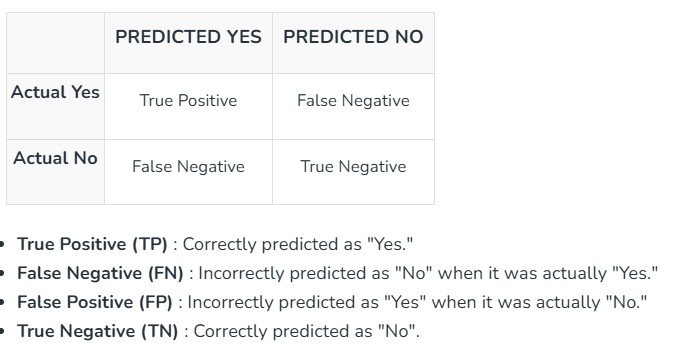

In [ ]:
#Alex

print(classification_report(y_test, y_pred)) #Precision : Measures the accuracy of positive predictions.
                                             #Recall : Indicates how many actual positives were correctly identified.
                                             #F1-Score : Balances precision and recall into a single score.
                                             #Support : Shows the number of samples for each class.

              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74        41
         1.0       0.78      0.84      0.81        50

    accuracy                           0.78        91
   macro avg       0.78      0.77      0.78        91
weighted avg       0.78      0.78      0.78        91



In [ ]:
#Jack
import numpy as np
import pandas as pd
#from pydataset import data
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

#load the data
df = pd.read_csv("cleanedData.csv")
#set the features to numerical values
df['gender'] = df['gender'].map({'male': 1, 'female': 0})
df['exang'] = df['exang'].map({'Yes': 1, 'No': 0})

#split the data
X = df.drop('target', axis=1) #features/independant variables, used to predict the target
y = df['target'] #target/dependant variables, which you are trying to predict
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
#the train sets are used for training the model and the test sets are used to evaluate the perfomance of the model

#scaling the features
scaler = MinMaxScaler() #initalise the scaler value
X_train_scaled = scaler.fit_transform(X_train) #Fits to the data, and transform it
X_test_scaled = scaler.transform(X_test) #transforms the data without fiting

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

#print("Descriptive statistics of scaled X_train:")
#print(X_train_scaled_df.describe())


model = svm.SVC(kernel='linear') #Initialize the Support Vector Classifier
model.fit(X_train_scaled, y_train) #Train the model using the training data
y_pred = model.predict(X_test_scaled) #Make predictions on the test data
print(classification_report(y_test, y_pred)) #Evaluate the model's performance
pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted']) #creates confusion matrix
print(f"TEST SCORE: {accuracy_score(y_test, y_pred)}")
print(f"TRAIN SCORE: {model.score(X_train_scaled, y_train)}")





              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.84      0.82      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

TEST SCORE: 0.8131868131868132
TRAIN SCORE: 0.8584905660377359


In [ ]:
# create grid search to improve test score - Monica
# reference: https://www.geeksforgeeks.org/machine-learning/svm-hyperparameter-tuning-using-gridsearchcv-ml/
# grid to hold hyperparameters to try

param = {"C": [0.1,1,10,100,1000],
              "gamma": [1, 0,1, 0.01, 'scale', 'auto'],
              "kernel": ['linear', 'poly', 'rbf', 'sigmoid']}

model = svm.SVC(random_state=42)
tuning = GridSearchCV(estimator=model, param_grid=param,cv= 10, scoring='accuracy', verbose = 3, n_jobs = -1)
tuning.fit(X_train_scaled, y_train)

# find best model
best_model = tuning.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"FINAL TEST SCORE: {accuracy}")
print(f"FINAL TRAIN SCORE: {best_model.score(X_train_scaled, y_train)}")


Fitting 10 folds for each of 120 candidates, totalling 1200 fits
FINAL TEST SCORE: 0.8131868131868132
FINAL TRAIN SCORE: 0.8726415094339622


My machine learning uses support vector classification to predict the target value for each tuple in the data. It first seperates the data into training and test sets and scales the values to make it fit the model. The accuracy is 81.3% with 74/91 correct values, which is okay but could be made better with further learning.
Jack

By implementing Grid search we can see that the model performance has increased to 83%. Here I have a passed in a wide range of hyperparameters to the grid in order to get the best hyperparameters for the model.

In [ ]:
#Daniel Support Vector Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("cleanedData.csv")



FileNotFoundError: [Errno 2] No such file or directory: 'cleanedData.csv'

# KNN Classifier algorithm


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing  import StandardScaler
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("cleanedData.csv")
#seperate the dependent and independent variables
y = df['target']
X = df.drop(['gender','target'], axis = 1)

X['exang'].replace("Yes", 1, inplace=True)
X['exang'].replace("No", 0, inplace=True)

#Split the data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
#scaling to prevent age from skewing results
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
K = []
training = []
test = []
scores = {}

for k in range(2,21):
  clf = KNeighborsClassifier(n_neighbors = k)
  clf.fit(X_train, y_train)

  training_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)
  print(f"Train: {training_score}")
  print(f"Test: {test_score}")
  K.append(k)

  training.append(training_score)
  test.append(test_score)
  scores[k] = [training_score,test_score]

for keys, values in scores.items():
    print(keys, ':', values)

ax = sns.stripplot(x=K, y=training)
ax.set(xlabel='Values of k', ylabel='Training Score')
plt.show()

ax = sns.stripplot(x=K, y=test)
ax.set(xlabel='Values of k', ylabel='Test Score')
plt.show()

plt.scatter(K, training, color='g')#changing colours to make it easy to tell which is which
plt.scatter(K, test, color='k')
plt.show()



ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

By Jedd
(add comments)


Feature scaling / normalisation changes features to be within a specific range to reduce the chance of outliers having heavy influence on the model and ensures all features contribute to the model. Since the dataset has different values with different scales, normalisation can help make feature comparison and analysis easier for the model to evaluate.

K-Nearest Neighbours Algorithm (Delyth)

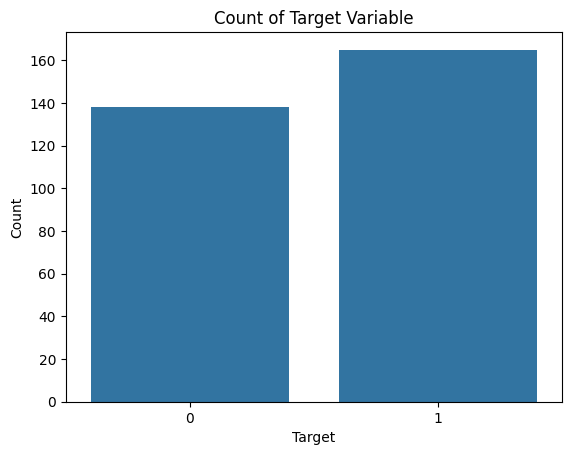

Minimum error:- 0.13043478260869565 at K = 10
TEST SCORE :0.8043478260869565
TRAIN SCORE: 0.8326848249027238


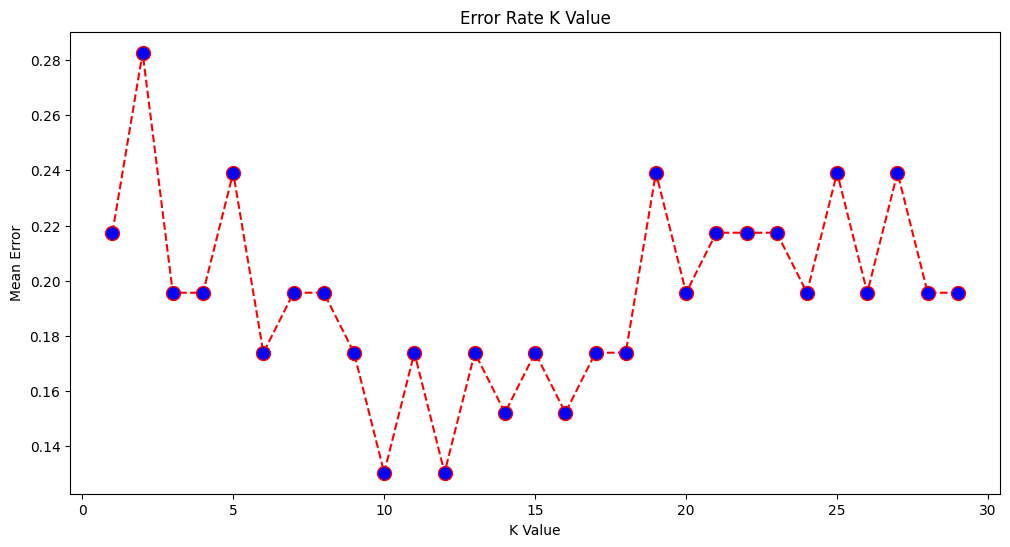

In [ ]:
# Guide -  https://www.analyticsvidhya.com/blog/2021/07/heart-disease-prediction-using-knn-the-k-nearest-neighbours-algorithm/

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# re-creating cleanedData.csv to ensure it exists before being read
path = '/content/cleanedData.csv'
data_for_cleaning = pd.read_csv(path)
data_for_cleaning['gender'] = data_for_cleaning['gender'].apply(lambda x: 'male' if x == 1 else 'female')
data_for_cleaning['exang'] = data_for_cleaning['exang'].map({1: 'Yes', 0:'No'})
data_for_cleaning.rename(columns={"gender":"gender"}, inplace=True)
data_for_cleaning.to_csv("cleanedData.csv", index=False)

df = pd.read_csv("cleanedData.csv")
df.head()

# Plot target variable count
sns.countplot(x='target', data=df)
plt.title('Count of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Identify categorical columns that need encoding
string_categorical_cols = ['gender', 'exang']

# One-hot encode the string categorical columns
X_features = df.drop('target', axis=1)
X_encoded = pd.get_dummies(X_features, columns=string_categorical_cols, drop_first=True)

# Convert to numpy array for scaling and model training
x = X_encoded.values
y = df['target'].values

# Split the dataset into the Training set and Test set
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.15, random_state=0)

# Feature Scaling
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

knnclassifier= KNeighborsClassifier(n_neighbors=7)
knnclassifier.fit(x_train, y_train)
y_pred= knnclassifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

print(f"TEST SCORE :{accuracy_score(y_test, y_pred)}")
print(f"TRAIN SCORE: {knnclassifier.score(x_train, y_train)}")

The above code shows the implementation of the K-Nearest Neighbours Algorithm (KNN) on the dataset. This analysis shows that there is 78% accuracy on 25% of the dataset which is a good sign. - Delyth

# KNN with hyperparameter tuning - Valentin. (below)

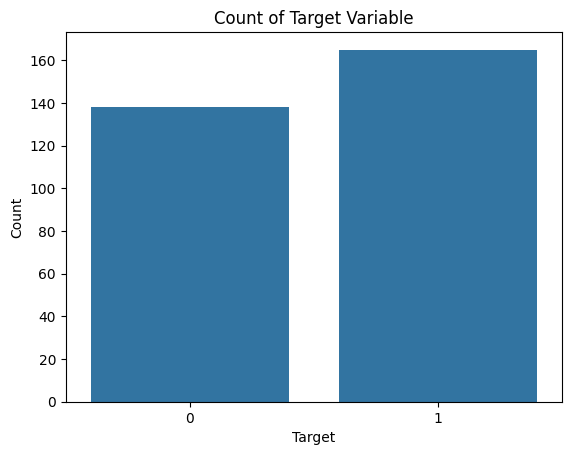

Best K: 6
Best Cross-Validation Score: 0.8171945701357466
TEST SCORE :0.8478260869565217
TRAIN SCORE: 0.8560311284046692


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# re-creating cleanedData.csv to ensure it exists before being read
path = '/content/cleanedData.csv'
data_for_cleaning = pd.read_csv(path)
data_for_cleaning['gender'] = data_for_cleaning['gender'].apply(lambda x: 'male' if x == 1 else 'female')
data_for_cleaning['exang'] = data_for_cleaning['exang'].map({1: 'Yes', 0:'No'})
data_for_cleaning.rename(columns={"gender":"gender"}, inplace=True)
data_for_cleaning.to_csv("cleanedData.csv", index=False)

df = pd.read_csv("cleanedData.csv")
df.head()

# Plot target variable count
sns.countplot(x='target', data=df)
plt.title('Count of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Identify categorical columns that need encoding
string_categorical_cols = ['gender', 'exang']

# One-hot encode the string categorical columns
X_features = df.drop('target', axis=1)
X_encoded = pd.get_dummies(X_features, columns=string_categorical_cols, drop_first=True)

# Convert to numpy array for scaling and model training
x = X_encoded.values
y = df['target'].values

# Split the dataset into the Training set and Test set
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.15, random_state=42)

# Pipeline: alternative to feature Scaling
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': range(1, 50),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski', 'euclidean', 'manhattan'],
    'knn__p': [1, 2],
}

grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(x_train, y_train)

print("Best K:", grid.best_params_['knn__n_neighbors'])
print("Best Cross-Validation Score:", grid.best_score_)

# Train final model using best K
knnclassifier = grid.best_estimator_

# Make predictions
y_pred = knnclassifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

print(f"TEST SCORE :{accuracy_score(y_test, y_pred)}")
print(f"TRAIN SCORE: {knnclassifier.score(x_train, y_train)}")

# Random Forest

In [ ]:
# Winter
# with help from https://www.geeksforgeeks.org/dsa/random-forest-classifier-using-scikit-learn/

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

data = pd.read_csv("cleanedData.csv")

# replace values to numeric only so it can be scaled
data.replace("male", 0, inplace=True)
data.replace("female", 1, inplace = True)
data['exang'].replace("No", 0, inplace=True)
data['exang'].replace("Yes", 1, inplace=True)

# divide input features from target variable to use to test and predict target
input_features = data.drop(columns=["target", "oldpeak"]) # x features
target_data = data['target'] # target we want to predict

# scaling
scaler = StandardScaler()
input_scaled = scaler.fit_transform(input_features)

# splitting data to train and test with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(input_scaled, target_data, test_size=0.2, random_state=42)

# predict
classifier = RandomForestClassifier(n_estimators=140, random_state=42)
model = classifier.fit(X_train, y_train)

y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

y_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# random forest hyperparameter tuning - monica
#Following video guide: https://youtu.be/5ONlGP0Nx3Q
from sklearn.model_selection import GridSearchCV

#tree numbers in random forest
# initialise parameters to be used in grid
n_estimators = [10,100,200,300]
max_features = ['log2', 'sqrt', None]
max_depth = [3,5,10,20, None]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2,4]
bootstrap = [True, False]

# create param grid
param_grid = [{
    'max_depth': max_depth,
    'max_features': max_features,
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}]

#re define model
rf = RandomForestClassifier(random_state=42)

rf_gridSearch = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring = "accuracy", verbose= 2, n_jobs = -1)
rf_gridSearch.fit(X_train, y_train)

print(f"BEST SCORE: {rf_gridSearch.best_score_}")


Train Accuracy: 1.0
Test Accuracy: 0.8524590163934426
Fitting 10 folds for each of 360 candidates, totalling 3600 fits


KeyboardInterrupt: 

In [ ]:
# get best model score of final tuned model of Random Forest classification
best_model = rf_gridSearch.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"FINAL ACCURACY SCORE: {accuracy} ")

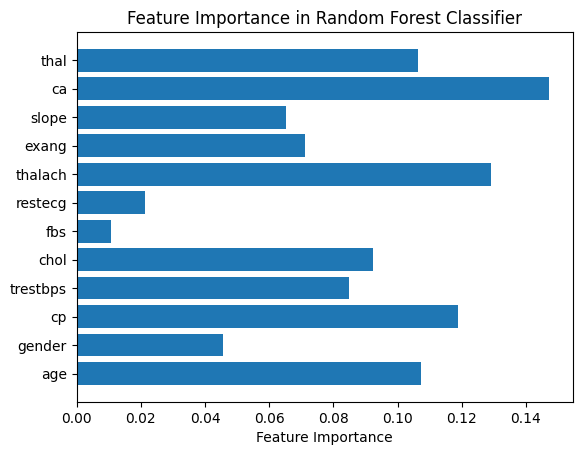

In [ ]:
# Winter
# Shows bar chart for how important each feature is
feature_importances = classifier.feature_importances_

plt.barh(input_features.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

In [ ]:
#XG BOOST - Valentin
#source:https://www.geeksforgeeks.org/machine-learning/implementation-of-xgboost-extreme-gradient-boosting/
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
import pandas as pd

cleaned_heart_data = pd.read_csv("cleanedData.csv")

# replace values to numeric only so data can be scaled
cleaned_heart_data.replace("male", 0, inplace=True)
cleaned_heart_data.replace("female", 1, inplace = True)
cleaned_heart_data['exang'].replace("No", 0, inplace=True)
cleaned_heart_data['exang'].replace("Yes", 1, inplace=True)

# divide input features from target variable to use to test and predict target
input_features = cleaned_heart_data.drop(columns="target")
target_data = cleaned_heart_data['target']

# set random state to ensure we get the SAME randomised dataset split instead of different result each time
# set test size of 30% the rest will be used for training
input_train, input_test, target_train, target_test = train_test_split(input_features, target_data, random_state = 42, test_size = 0.4)

xgb_train = xgb.DMatrix(input_train, target_train, enable_categorical=True)
xgb_test = xgb.DMatrix(input_test, target_test, enable_categorical=True)

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
}
n=50
model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)

preds = model.predict(xgb_test)
preds = np.round(preds)
accuracy= accuracy_score(target_test,preds)
print('ACCURACY OF THE MODEL:', accuracy*100,"\n")

#hyperparameter tuning - Monica
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
from sklearn.model_selection import GridSearchCV
params_1 = {
    "max_depth": [3,4,5,6,8,10,12,15],
    "min_child_weight": [1,3,5,7],
}

gridS1 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1,
                                               n_estimators = 140,
                                               max_depth = 4,
                                               min_child_weight = 2,
                                               gamma = 0,
                                               subsample = 0.8,
                                               colsample_bytree = 0.8,
                                                scale_pos_weight = 1,
                                               objective = 'binary:logistic'),
                                               param_grid = params_1,scoring = 'roc_auc', n_jobs =4, cv=5)
gridS1.fit(input_train, target_train)
# evalutating max depth and min child weight first. Outcome : max:depth 8 and min_child_weight give best results
print("BEST PARAMETERS: ", gridS1.best_params_)
print("BEST ACCURACY: ", gridS1.best_score_)
best_model = gridS1.best_estimator_

y_pred = best_model.predict(input_test)
accuracy = accuracy_score(target_test, y_pred)
print(f"FINAL ACCURACY SCORE: {accuracy} ")


ACCURACY OF THE MODEL: 85.24590163934425 



/tmp/ipython-input-2224268557.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_heart_data.replace("female", 1, inplace = True)
/tmp/ipython-input-2224268557.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_heart_data['exang'].replace("No", 0, inplace=True)
/tmp/ipython-input-

BEST PARAMETERS:  {'max_depth': 3, 'min_child_weight': 5}
BEST ACCURACY:  0.9254557963536291
FINAL ACCURACY SCORE: 0.8524590163934426 


In [ ]:
# to allow clear hyperparameter testing the XGB MODEL was redone -MONICA
# reference: https://youtu.be/wqnwm15bg7A
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
# input features = all columns that are not the target also known as the X data
input_features = cleaned_heart_data.drop(columns="target")

#target data = just the target column also known as the Y data that is dependent on the other features
target_data = cleaned_heart_data['target']

# split data for testing and training only used testing for final
input_train, input_test, target_train, target_test = train_test_split(input_features, target_data, random_state = 42, test_size = 0.4)

# split data for validation used to see how well model is performing
input_train_VAL, input_test_VAL, target_train_VAL, target_test_VAL = train_test_split(input_train, target_train, test_size = 0.25, random_state = 42)

# scale the features
scaler = StandardScaler()
input_train = scaler.fit_transform(input_train)
input_test = scaler.transform(input_test)
input_train_VAL = scaler.transform(input_train_VAL)

# start creating model
# random_state = get same results every time
# no hyperparameter tuning to see how it does inititally
xgbClass = xgb.XGBClassifier(random_state=42)

xgbClass.fit(input_train, target_train)

# see how it performs on validation set initially
# classifier classifies each of the categories in the validation set into what it predicts it to be
target_pred = xgbClass.predict(input_test_VAL)

#input test VAL = the actual values in the validation set
# target_pred = what the xgb classifier classifies the data
accuracy = accuracy_score(target_test_VAL, target_pred)
print(f"Initial validation Accuracy: {accuracy}")

# begin hyperparameter tuning
params = {
    'n_estimators': [100, 200, 300,500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.85, 1.0],
    'reg_alpha': [0, 0.01, 0.1,1,10,100],
    'reg_lambda': [0.5,0.7,1,1.3]
}
xgbClass = xgb.XGBClassifier(random_state=42)

#use cross validation to determine best set of hyperparameters
# using randomised search cv to decrease time used to search through different parameters
# n_iter: how manu combinations to search through
grid_search = RandomizedSearchCV(xgbClass, params, cv=10, scoring = "accuracy", n_iter=100, n_jobs = -1, verbose = 2)
grid_search.fit(input_train, target_train)

best_xgbModel = grid_search.best_estimator_
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

# test on actual data
y_pred = best_xgbModel.predict(input_test)
accuracy = accuracy_score(target_test, y_pred)

#final accuracy score is usually slightly slower to real test
print(f"FINAL ACCURACY SCORE: {accuracy} ")


Initial validation Accuracy: 0.7608695652173914
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best Accuracy: 0.8394736842105264
FINAL ACCURACY SCORE: 0.8278688524590164 


n estimators: number of trees in model

learning rate: rate at which model makes changes to weights

max depth: number of levels of tree

min child weight: minimum number of data points present in tree

subsample: no of observations

colsample: how many features are used to build tree

reg_alpha, reg_lambda: strength of regulization l1, l2